<a href="https://colab.research.google.com/github/gmazizi/CNN-/blob/main/CNN_implementation_image_prediction_using_CIFAR_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
'''
CIFAR-10 Dataset as it suggests has 10 different categories of images in it.
There is a total of 60000 images of 10 different classes naming (
Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck ).
All the images are of size 32×32. There are in total 50000 train images and 10000 test images.
'''
#Normalize images values between 0 and 1
train_images, test_images=train_images/255.0,test_images/255.0


170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


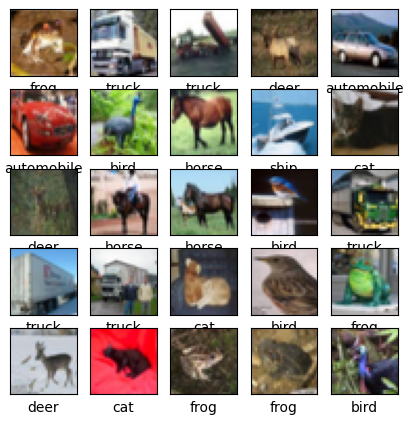

In [ ]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

#verifying data
class_names=['airplain','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],aspect='auto')
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#traning the model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))


In [ ]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7cd21a93f880>>

In [ ]:
# adding the Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10 ))

In [ ]:
#compile and train the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.5133 - accuracy: 0.4502 - val_loss: 1.2534 - val_accuracy: 0.5594
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1527 - accuracy: 0.5943 - val_loss: 1.0583 - val_accuracy: 0.6310
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0051 - accuracy: 0.6491 - val_loss: 1.0189 - val_accuracy: 0.6420
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9118 - accuracy: 0.6823 - val_loss: 0.9605 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8432 - accuracy: 0.7073 - val_loss: 1.0470 - val_accuracy: 0.6446
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7886 - accuracy: 0.7264 - val_loss: 0.9155 - val_accuracy: 0.6845
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7374 - accuracy: 0.7416 - val_loss: 0.9122 - val_accuracy

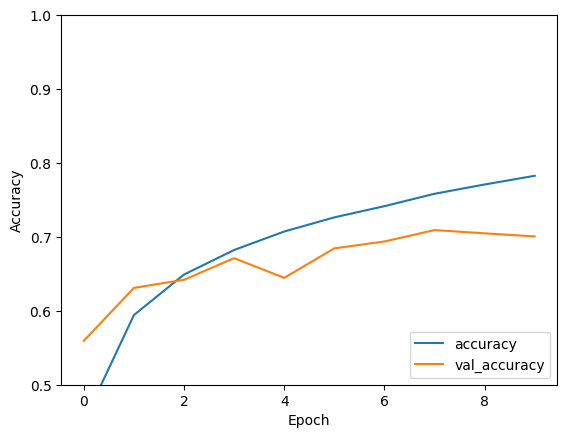

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc= model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.9041 - accuracy: 0.7006 - 638ms/epoch - 2ms/step


In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                  height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(train_images, train_labels, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(test_images,test_labels),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.9191 - accuracy: 0.6804 - val_loss: 0.8860 - val_accuracy: 0.6997
Epoch 2/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.8758 - accuracy: 0.6947 - val_loss: 0.8046 - val_accuracy: 0.7235
Epoch 3/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.8522 - accuracy: 0.7039 - val_loss: 0.8929 - val_accuracy: 0.7015
Epoch 4/50
1562/1562 [==============================] - 32s 20ms/step - loss: 0.8256 - accuracy: 0.7105 - val_loss: 0.7913 - val_accuracy: 0.7328
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.8145 - accuracy: 0.7167 - val_loss: 0.7809 - val_accuracy: 0.7347
Epoch 6/50
1562/1562 [==============================] - 31s 20ms/step - loss: 0.7978 - accuracy: 0.7218 - val_loss: 0.7636 - val_accuracy: 0.7384
Epoch 7/50
1562/1562 [==============================] - 32s 21ms/step - loss: 0.7840 - accuracy: 0.7258 - val_loss: 0.7534 -

In [ ]:
test_loss, test_acc= model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.6678 - accuracy: 0.7789 - 665ms/epoch - 2ms/step


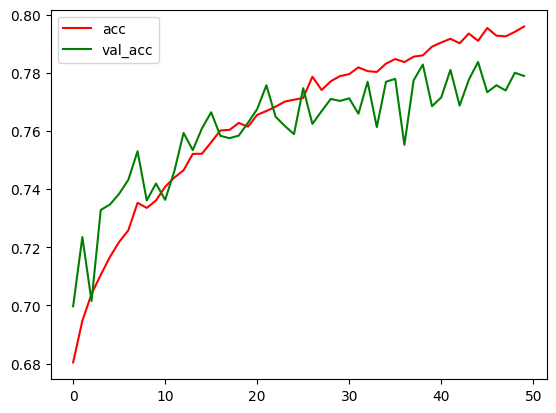

In [ ]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [ ]:
# label mapping


import numpy as np
import random

# select the image from our test dataset
image_number = random.randint(1,5000)
print("randomly selected image number is ",image_number)
# display the image
plt.imshow(test_images[image_number])

# load the image in an array
n = np.array(test_images[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
print(model.predict(p))
predicted_label = class_names[model.predict(p).argmax()]

# load the original label
print(test_labels[image_number])
original_label = class_names[int(test_labels[image_number])]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

randomly selected image number is  3844


NameError: name 'plt' is not defined